In [385]:
import numpy as np

import pandas as pd
import re

from datetime import datetime, timedelta
from scipy.interpolate import UnivariateSpline

import matplotlib.pyplot as plt

### 香港每日总雨量数据
香港十八区：
Eastern District 香港东区 Southern District 香港南区 North District 北区
Islands District 离岛区 Kwun Tong 观塘 Tai Po大埔区 Yuen Long 元朗 Wan Chai 湾仔
Tsuen Wan 荃湾 Sai Kung西贡 Sham Shui Po深水埗 Sha Tin 沙田 
Wong Tai Sin 黄大仙 Yau Tsim Mong 油尖旺 Kowloon City 九龙城 
Kwai Tsing 葵青区 Central & Western District 中西区 Tuen Mun 屯门 


In [386]:
rain_data = pd.read_csv('../2019-2023full_data/data_info_rain_par.csv', 
                   header=0, names=["Time","area","rain"])

def process_column(value):
    if 'to' in value:
        numbers = [int(num) for num in value.split(' to ')]
        return sum(numbers) / len(numbers)
    else:
        return int(value)

# 2020年每日各地区雨量数据
rain_data_2020 = rain_data[rain_data["Time"].str.startswith("2020")]
rain_data_2020['rain'] = rain_data_2020['rain'].apply(process_column)
# 使用iterrows()遍历DataFrame
# rain_data_2020['rain'] = rain_data_2020['rain'].apply(lambda x: re.search(r'to (\d+)', x).group(1) if re.search(r'to (\d+)', x) else x).astype(int)
   
# # 2021年每日各地区雨量数据
rain_data_2021 = rain_data[rain_data["Time"].str.startswith("2021")]
rain_data_2021['rain'] = rain_data_2021['rain'].apply(process_column)
# rain_data_2021["rain"] = rain_data_2021["rain"].apply(lambda x: re.search(r'to (\d+)', x).group(1) if re.search(r'to (\d+)', x) else x).astype(int)
# 
# # 2022年每日各地区雨量数据
rain_data_2022 = rain_data[rain_data["Time"].str.startswith("2022")]
rain_data_2022['rain'] = rain_data_2022['rain'].apply(process_column)
# rain_data_2022["rain"] = rain_data_2022["rain"].apply(lambda x: re.search(r'to (\d+)', x).group(1) if re.search(r'to (\d+)', x) else x).astype(int)
# 
# # 2023年每日各地区雨量数据 只处理到10月不然会影响十一月的值
rain_data_2023 = rain_data[rain_data["Time"].str.startswith("2023")]
rain_data_2023['rain'] = rain_data_2023['rain'].apply(process_column)
rain_data_2023 = rain_data_2023[:11340]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\414803299.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2020['rain'] = rain_data_2020['rain'].apply(process_column)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\414803299.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2021['rain'] = rain_data_2021['rain'].apply(process_column)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\414803299.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

雨量分析
黄色暴雨 红色暴雨 黑色暴雨 每小时雨量 > 30 50 70 
横向： 
1. 每片区域 每个月的 降雨总量 降雨日数 强降雨日数
2. 香港 每个月的 平均降雨量 降雨日数 强降雨日数
纵向： 
1. 每个月 每片区域的 降雨总量
2. 每个月 香港的 平均降雨量


### 2020年各区月降雨量 柱状图

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\4233377009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2020['month'] = rain_data_2020["Time"].str[5:7]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\4233377009.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 3, i+1)


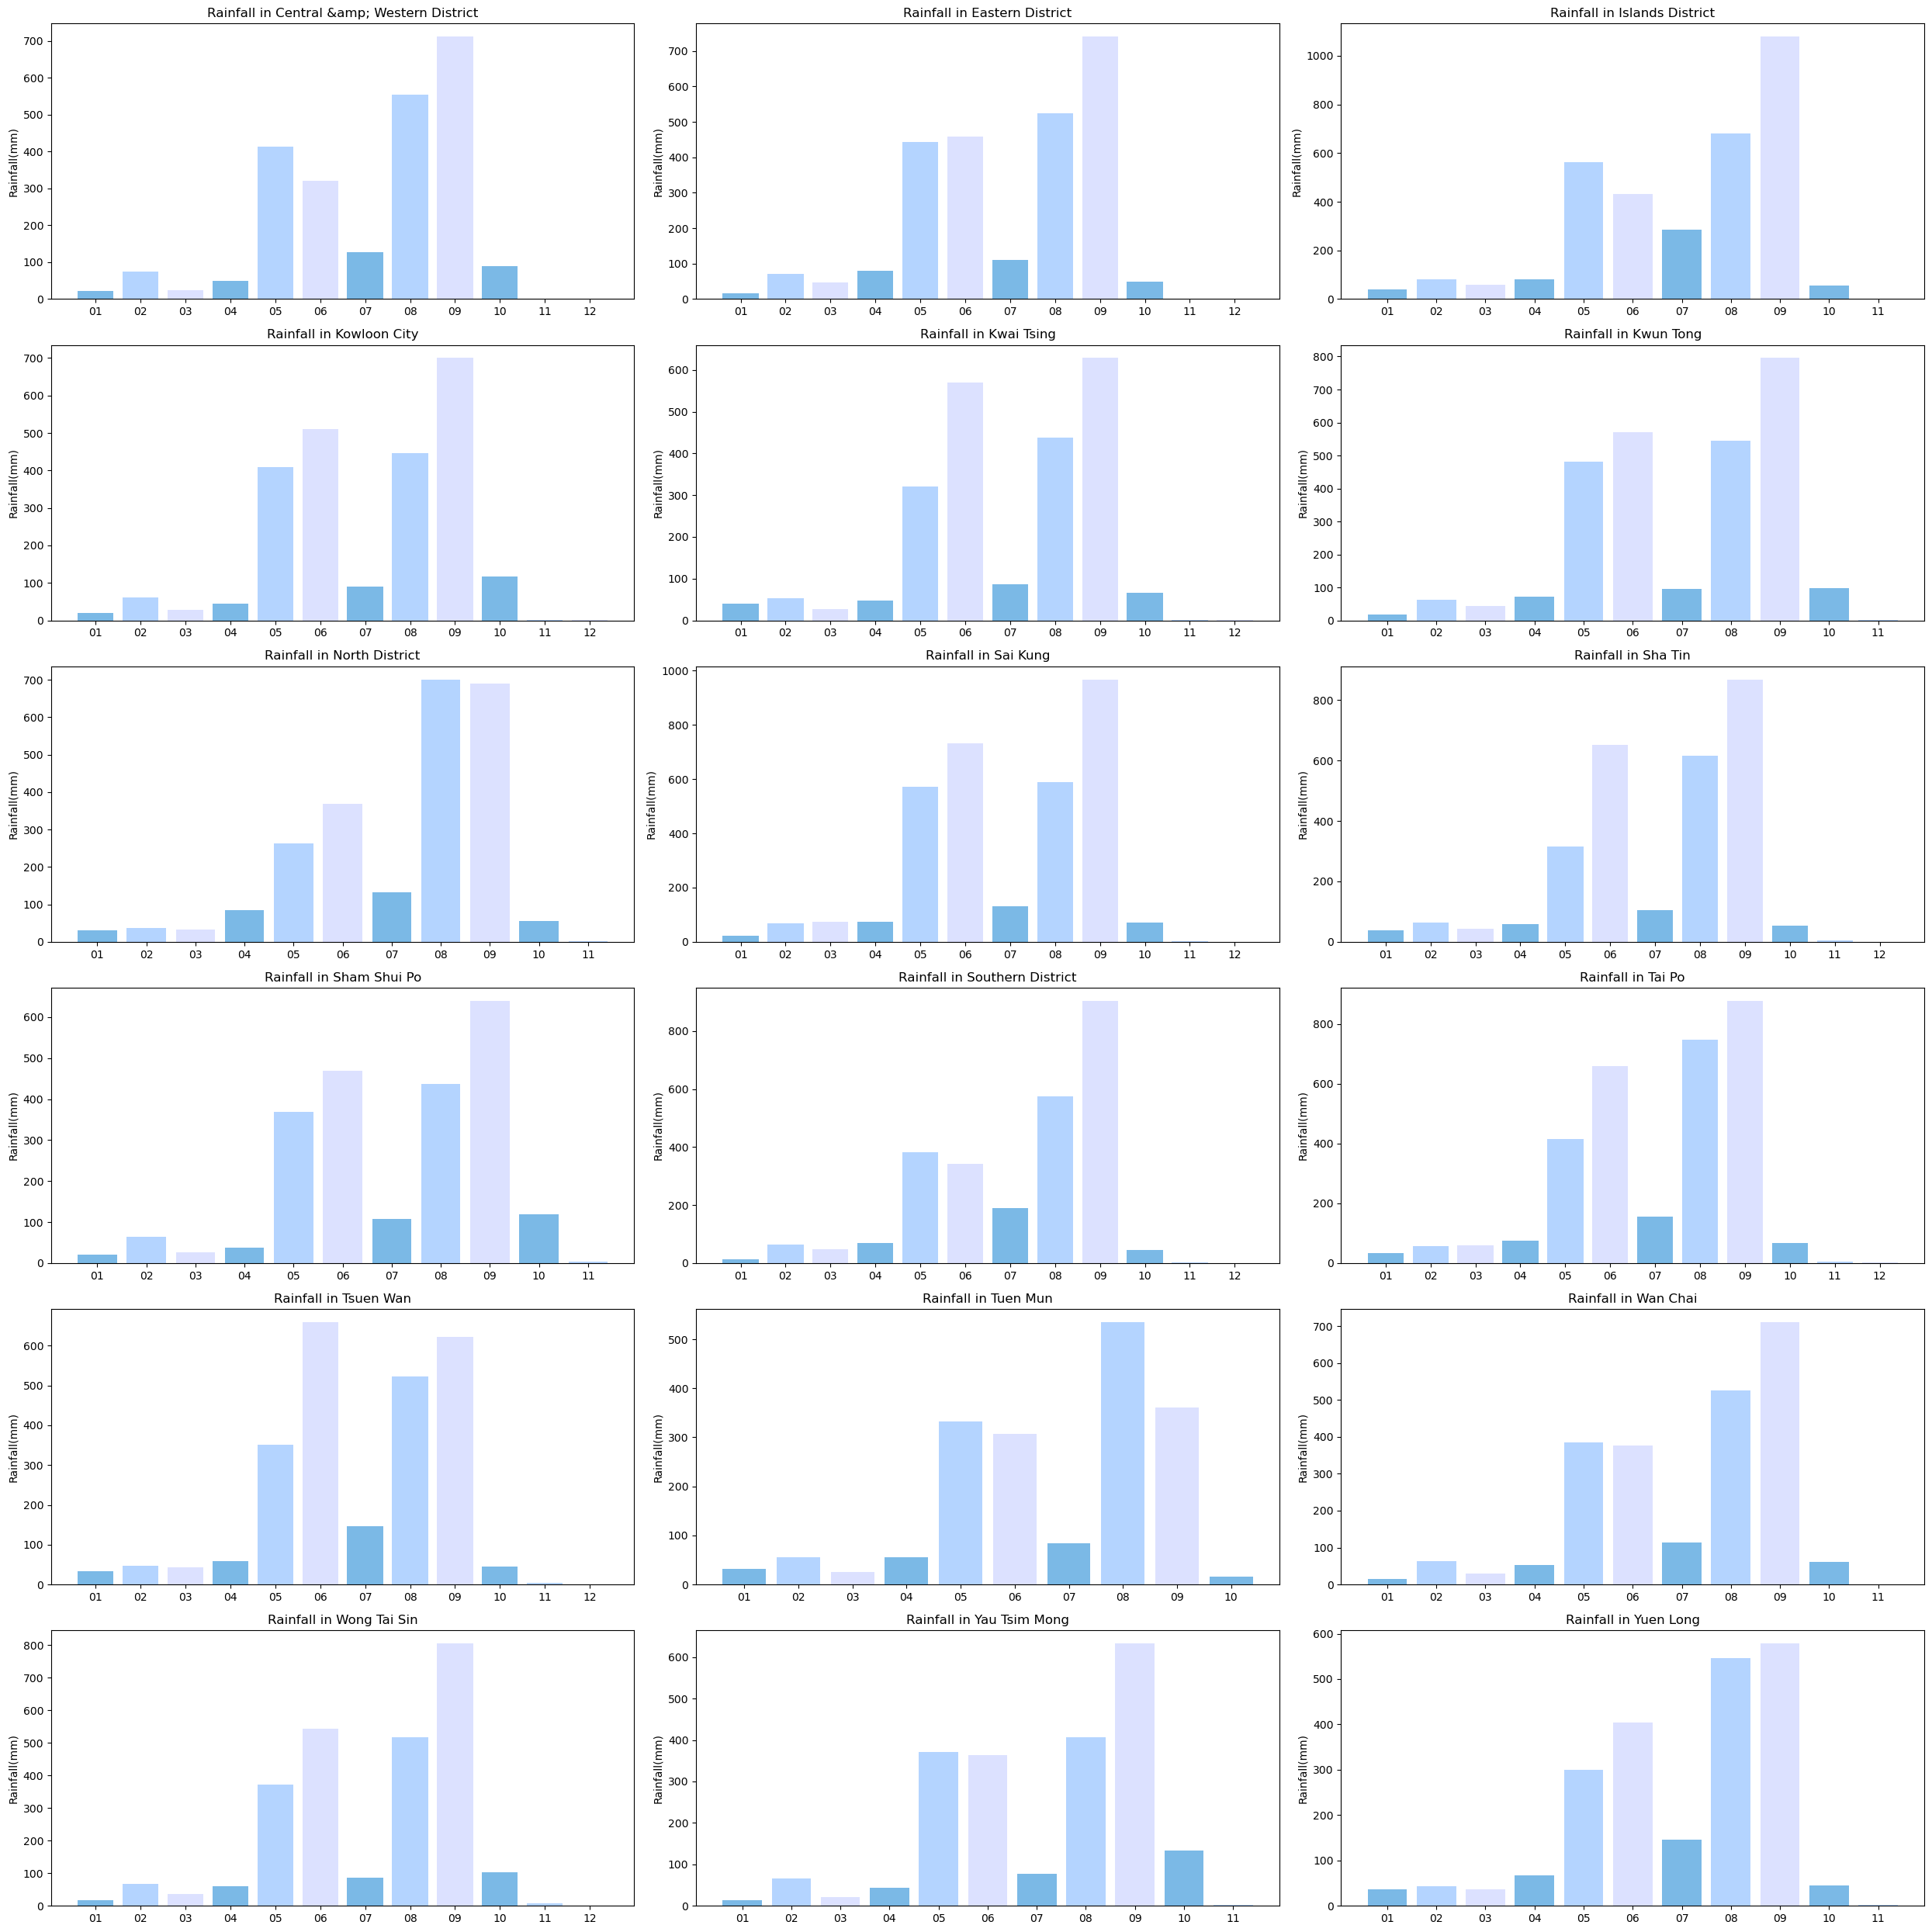

In [387]:
rain_data_2020['month'] = rain_data_2020["Time"].str[5:7]
data_2020 = rain_data_2020.groupby(['area', 'month'])["rain"].sum()
data_2020 = data_2020.reset_index()

areas = data_2020['area'].unique()

fig = plt.subplots(figsize = (25,25))
for i, area in enumerate(areas):
   plt.subplot(6, 3, i+1)
   area_data = data_2020[data_2020['area'] == area]
   plt.bar(area_data['month'],area_data['rain'],color=['#248BD6', '#83B8FF', '#C6CDFF'], width=0.8,alpha = 0.6)
   plt.title(f'Rainfall in {area}')
   plt.ylabel('Rainfall(mm)')

plt.tight_layout()
# left 控制左边位置；wspace，hspace 控制子图间距
# fig.subplots_adjust(left=0,right=1,top=1,bottom=0,wspace=0.2,hspace=0.5)
plt.show()
   

### 2020-2023 汇总 平均月降水量

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\3518130973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2021['month'] = rain_data_2021["Time"].str[5:7]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\3518130973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2022['month'] = rain_data_2022["Time"].str[5:7]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\3518130973.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be rem

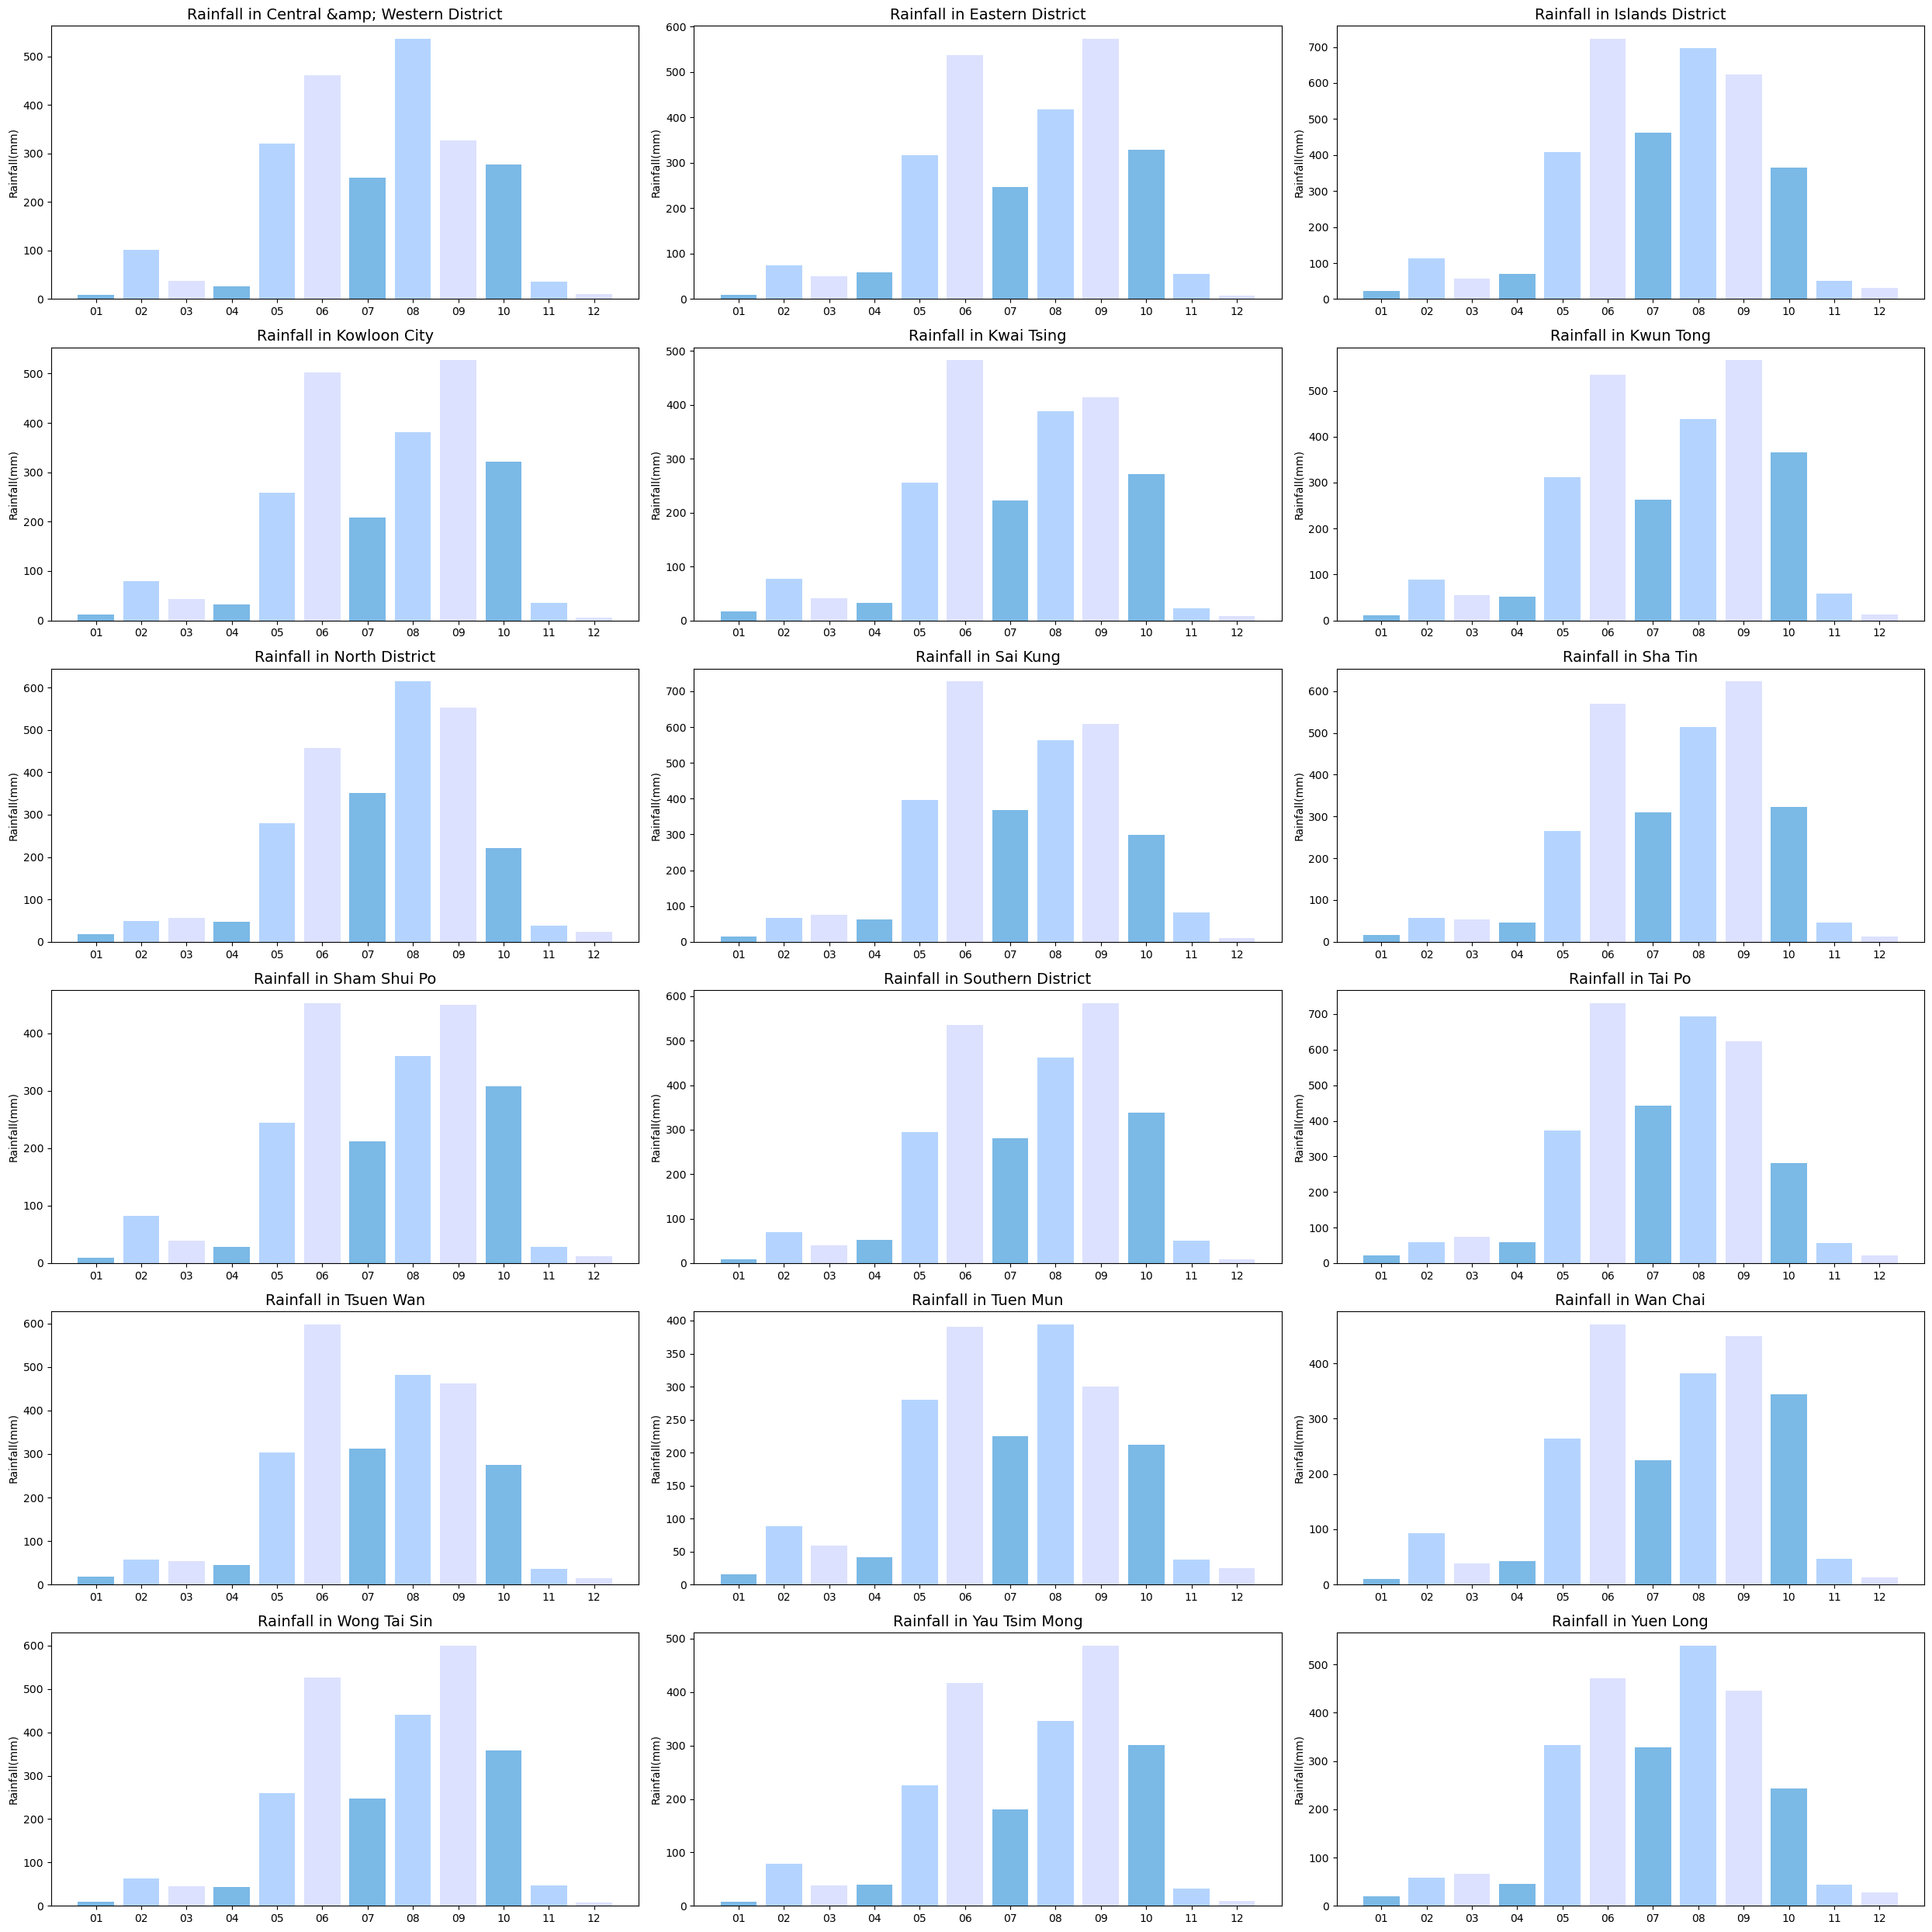

In [388]:
rain_data_2021['month'] = rain_data_2021["Time"].str[5:7]
data_2021 = rain_data_2021.groupby(['area', 'month'])["rain"].sum()
data_2021 = data_2021.reset_index()

rain_data_2022['month'] = rain_data_2022["Time"].str[5:7]
data_2022 = rain_data_2022.groupby(['area', 'month'])["rain"].sum()
data_2022 = data_2022.reset_index()

rain_data_2023['month'] = rain_data_2023["Time"].str[5:7]
data_2023 = rain_data_2023.groupby(['area', 'month'])["rain"].sum()
data_2023 = data_2023.reset_index()
data_2023.drop(11, inplace=True)
# result = data_2023[data_2023['month'] == '01']
# result

all_data = pd.concat([data_2020, data_2021, data_2022, data_2023])
monthly_total_rain = all_data.groupby(['area','month'])['rain'].mean()
monthly_total_rain= monthly_total_rain.reset_index()
monthly_total_rain
# result = monthly_total_rain[monthly_total_rain['area'] == 'Central & Western District']
# result

# 我也不知道为什么 反正就有俩中西区，删一个得了
areas = monthly_total_rain['area'].unique()[1:]
fig = plt.subplots(figsize = (25,25))
for i, area in enumerate(areas):
   plt.subplot(6, 3, i+1)
   area_data = monthly_total_rain[monthly_total_rain['area'] == area]
   plt.bar(area_data['month'],area_data['rain'], color=['#248BD6', '#83B8FF', '#C6CDFF'], width=0.8,alpha = 0.6)
   plt.title(f'Rainfall in {area}', fontdict={'weight':'normal', 'size': 14})
   plt.ylabel('Rainfall(mm)')

plt.tight_layout()
# left 控制左边位置；wspace，hspace 控制子图间距
# fig.subplots_adjust(left=0,right=1,top=1,bottom=0,wspace=0.2,hspace=0.5)
plt.show()

### 2020-2023年每个地区的平均年降水量

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\252511240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts_rain_2020['Time'] = districts_rain_2020["Time"].str[:4]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\252511240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts_rain_2021['Time'] = districts_rain_2021["Time"].str[:4]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\252511240.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

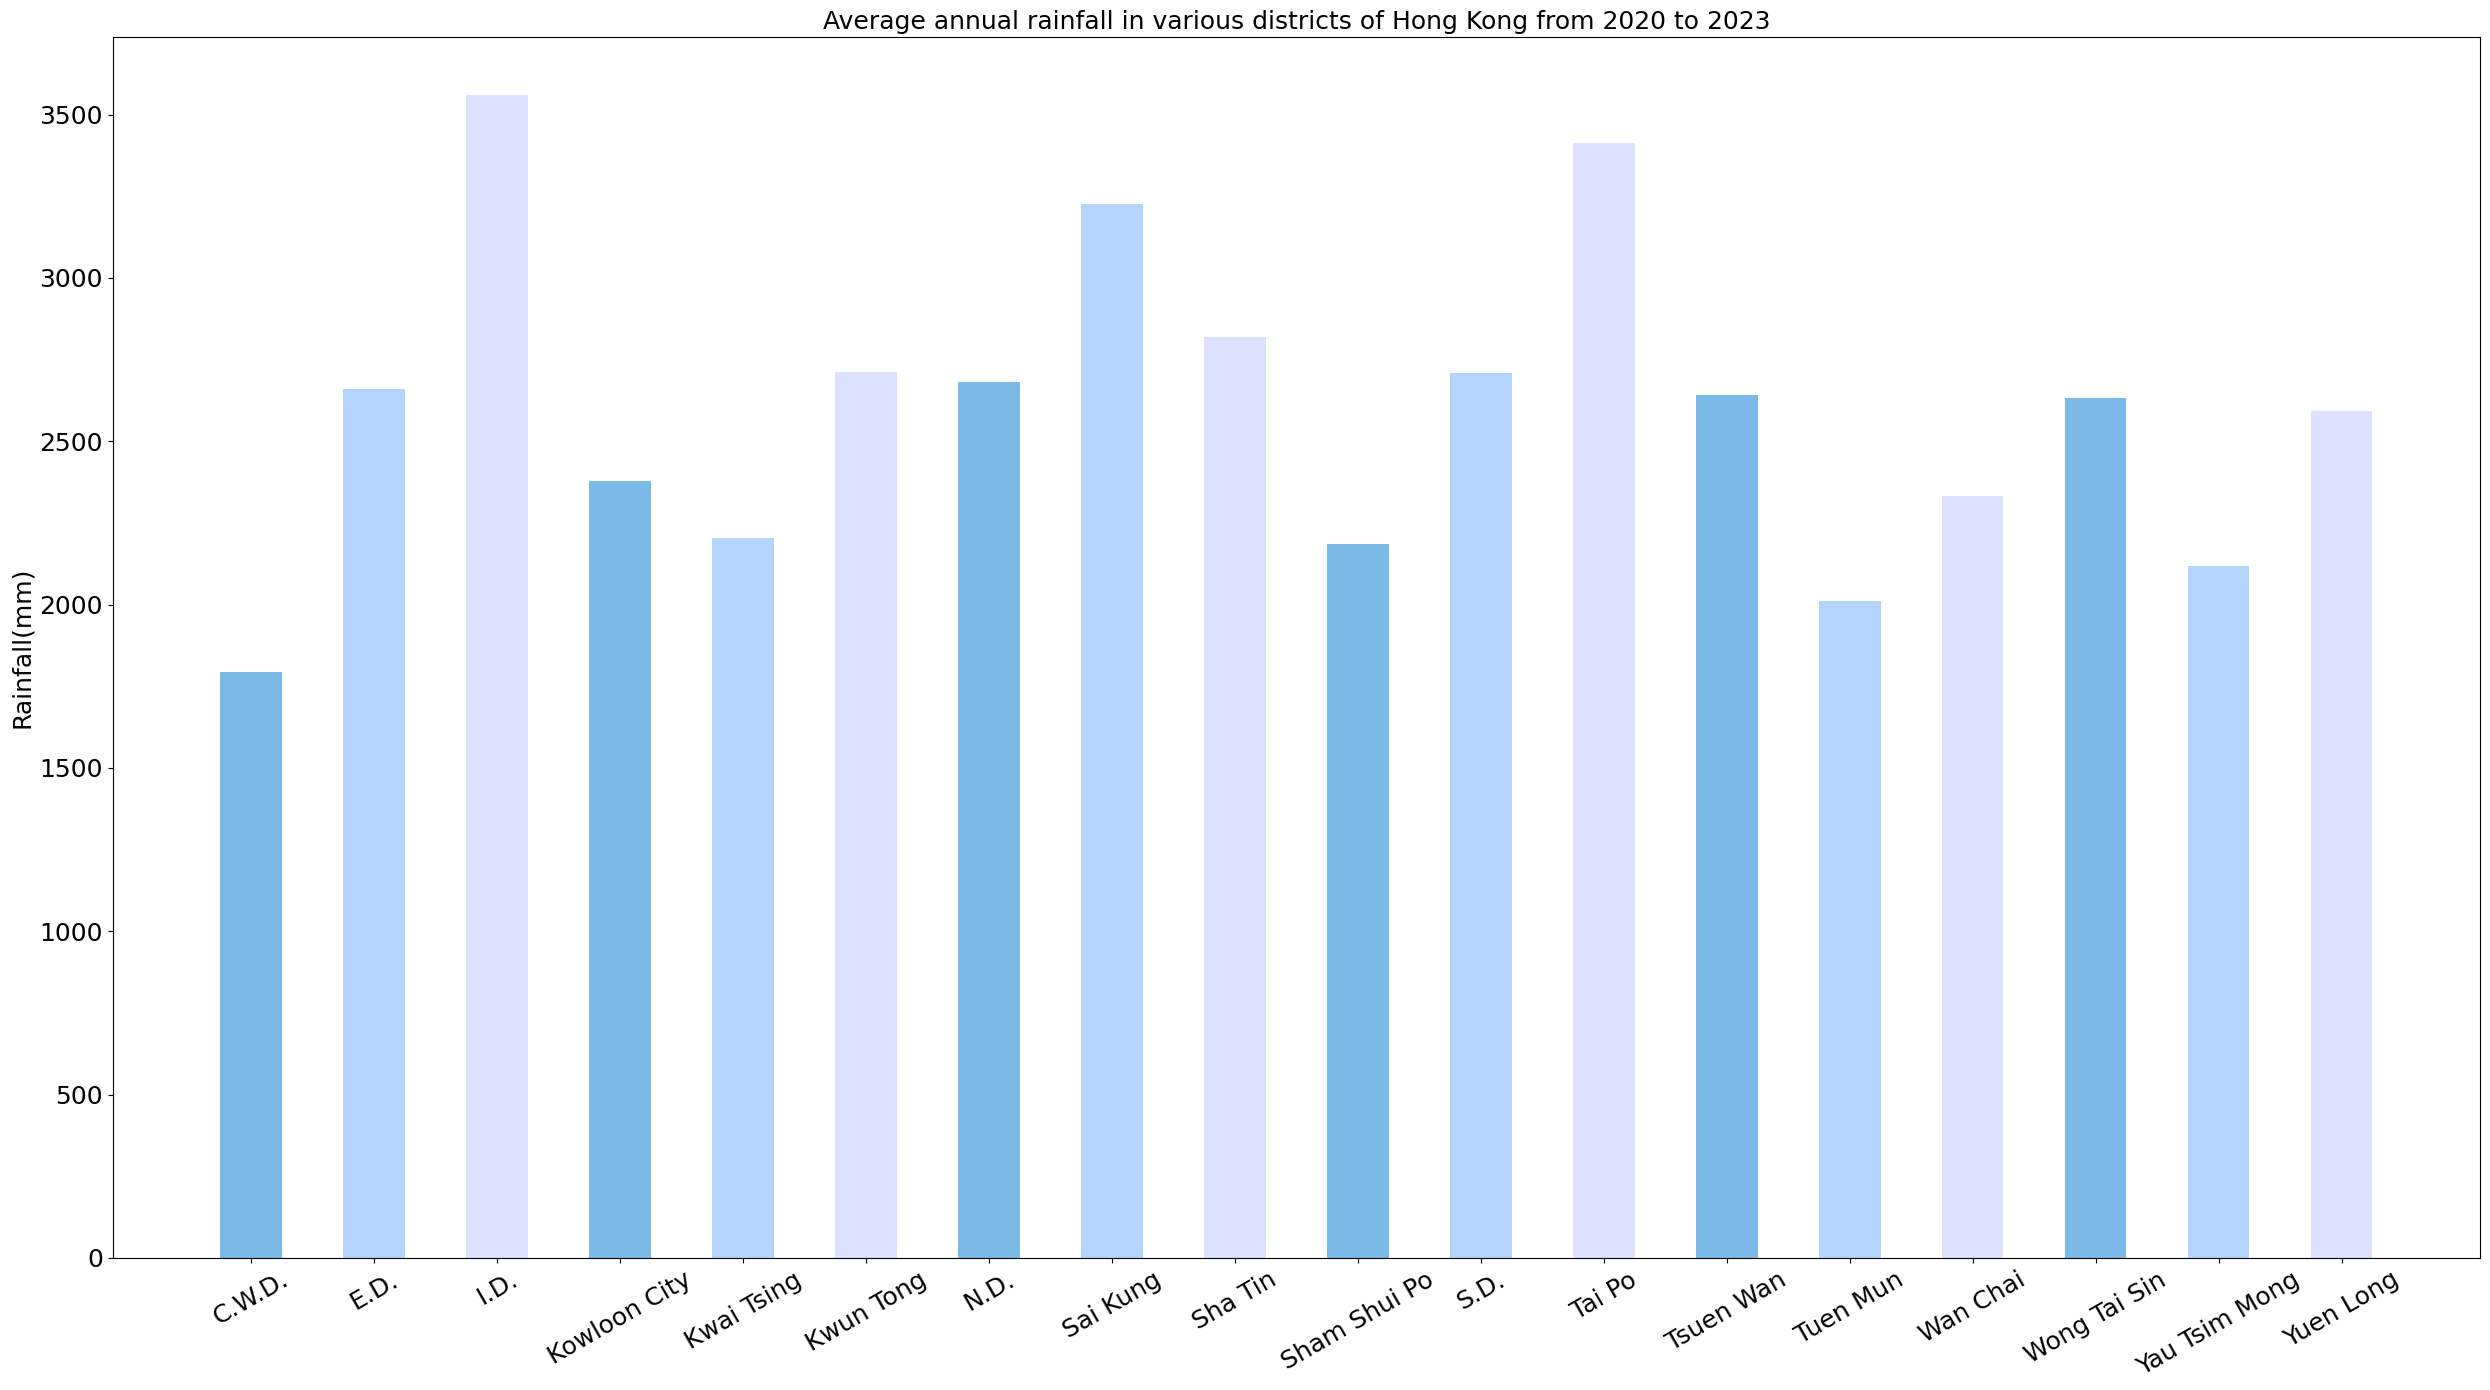

In [389]:
districts_rain_2020 = rain_data_2020[["Time", "area", "rain"]]
districts_rain_2020['Time'] = districts_rain_2020["Time"].str[:4]
districts_2020 = districts_rain_2020.groupby(["Time","area"])['rain'].sum()

districts_rain_2021 = rain_data_2021[["Time", "area", "rain"]]
districts_rain_2021['Time'] = districts_rain_2021["Time"].str[:4]
districts_2021 = districts_rain_2021.groupby(["Time","area"])['rain'].sum()

districts_rain_2022 = rain_data_2022[["Time", "area", "rain"]]
districts_rain_2022['Time'] = districts_rain_2022["Time"].str[:4]
districts_2022 = districts_rain_2022.groupby(["Time","area"])['rain'].sum()

districts_rain_2023 = rain_data_2023[["Time", "area", "rain"]]
districts_rain_2023['Time'] = districts_rain_2023["Time"].str[:4]
districts_2023 = districts_rain_2023.groupby(["Time","area"])['rain'].sum()

all_district_data = pd.concat([districts_2020, districts_2021, districts_2022, districts_2023])
yearly_district_data = all_district_data.reset_index().groupby(['area'])['rain'].mean()
yearly_district_data= yearly_district_data.reset_index()

# 删掉重复的中西区 将长名字改成简称
yearly_district_data.drop(0, inplace=True)
yearly_district_data.loc[1, 'area'] = 'C.W.D.'
yearly_district_data.loc[2, 'area'] = 'E.D.'
yearly_district_data.loc[3, 'area'] = 'I.D.'
yearly_district_data.loc[7, 'area'] = 'N.D.'
yearly_district_data.loc[11, 'area'] = 'S.D.'

fig = plt.subplots(figsize = (25,14))
x = yearly_district_data['area']
y = yearly_district_data["rain"]
plt.bar(x,y, color=['#248BD6', '#83B8FF', '#C6CDFF'], width=0.5,alpha = 0.6)
plt.title("Average annual rainfall in various districts of Hong Kong from 2020 to 2023", fontdict={'weight':'normal', 'size': 18})
plt.ylabel('Rainfall(mm)', fontdict={'size':18})
plt.xticks(rotation=30, size=18)
plt.yticks(size=18)
plt.tight_layout()
plt.show()

    由于地域面积不清楚，我们单独对深水埗区进行分析 （美其名曰和我们息息相关的深水埗）

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\1586667260.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np.arange(12) +1, fontsize = 18)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\1586667260.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.arange(0, 501, 100), fontsize = 18)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\1586667260.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.arange(0, 25, 5), fontsize = 18)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


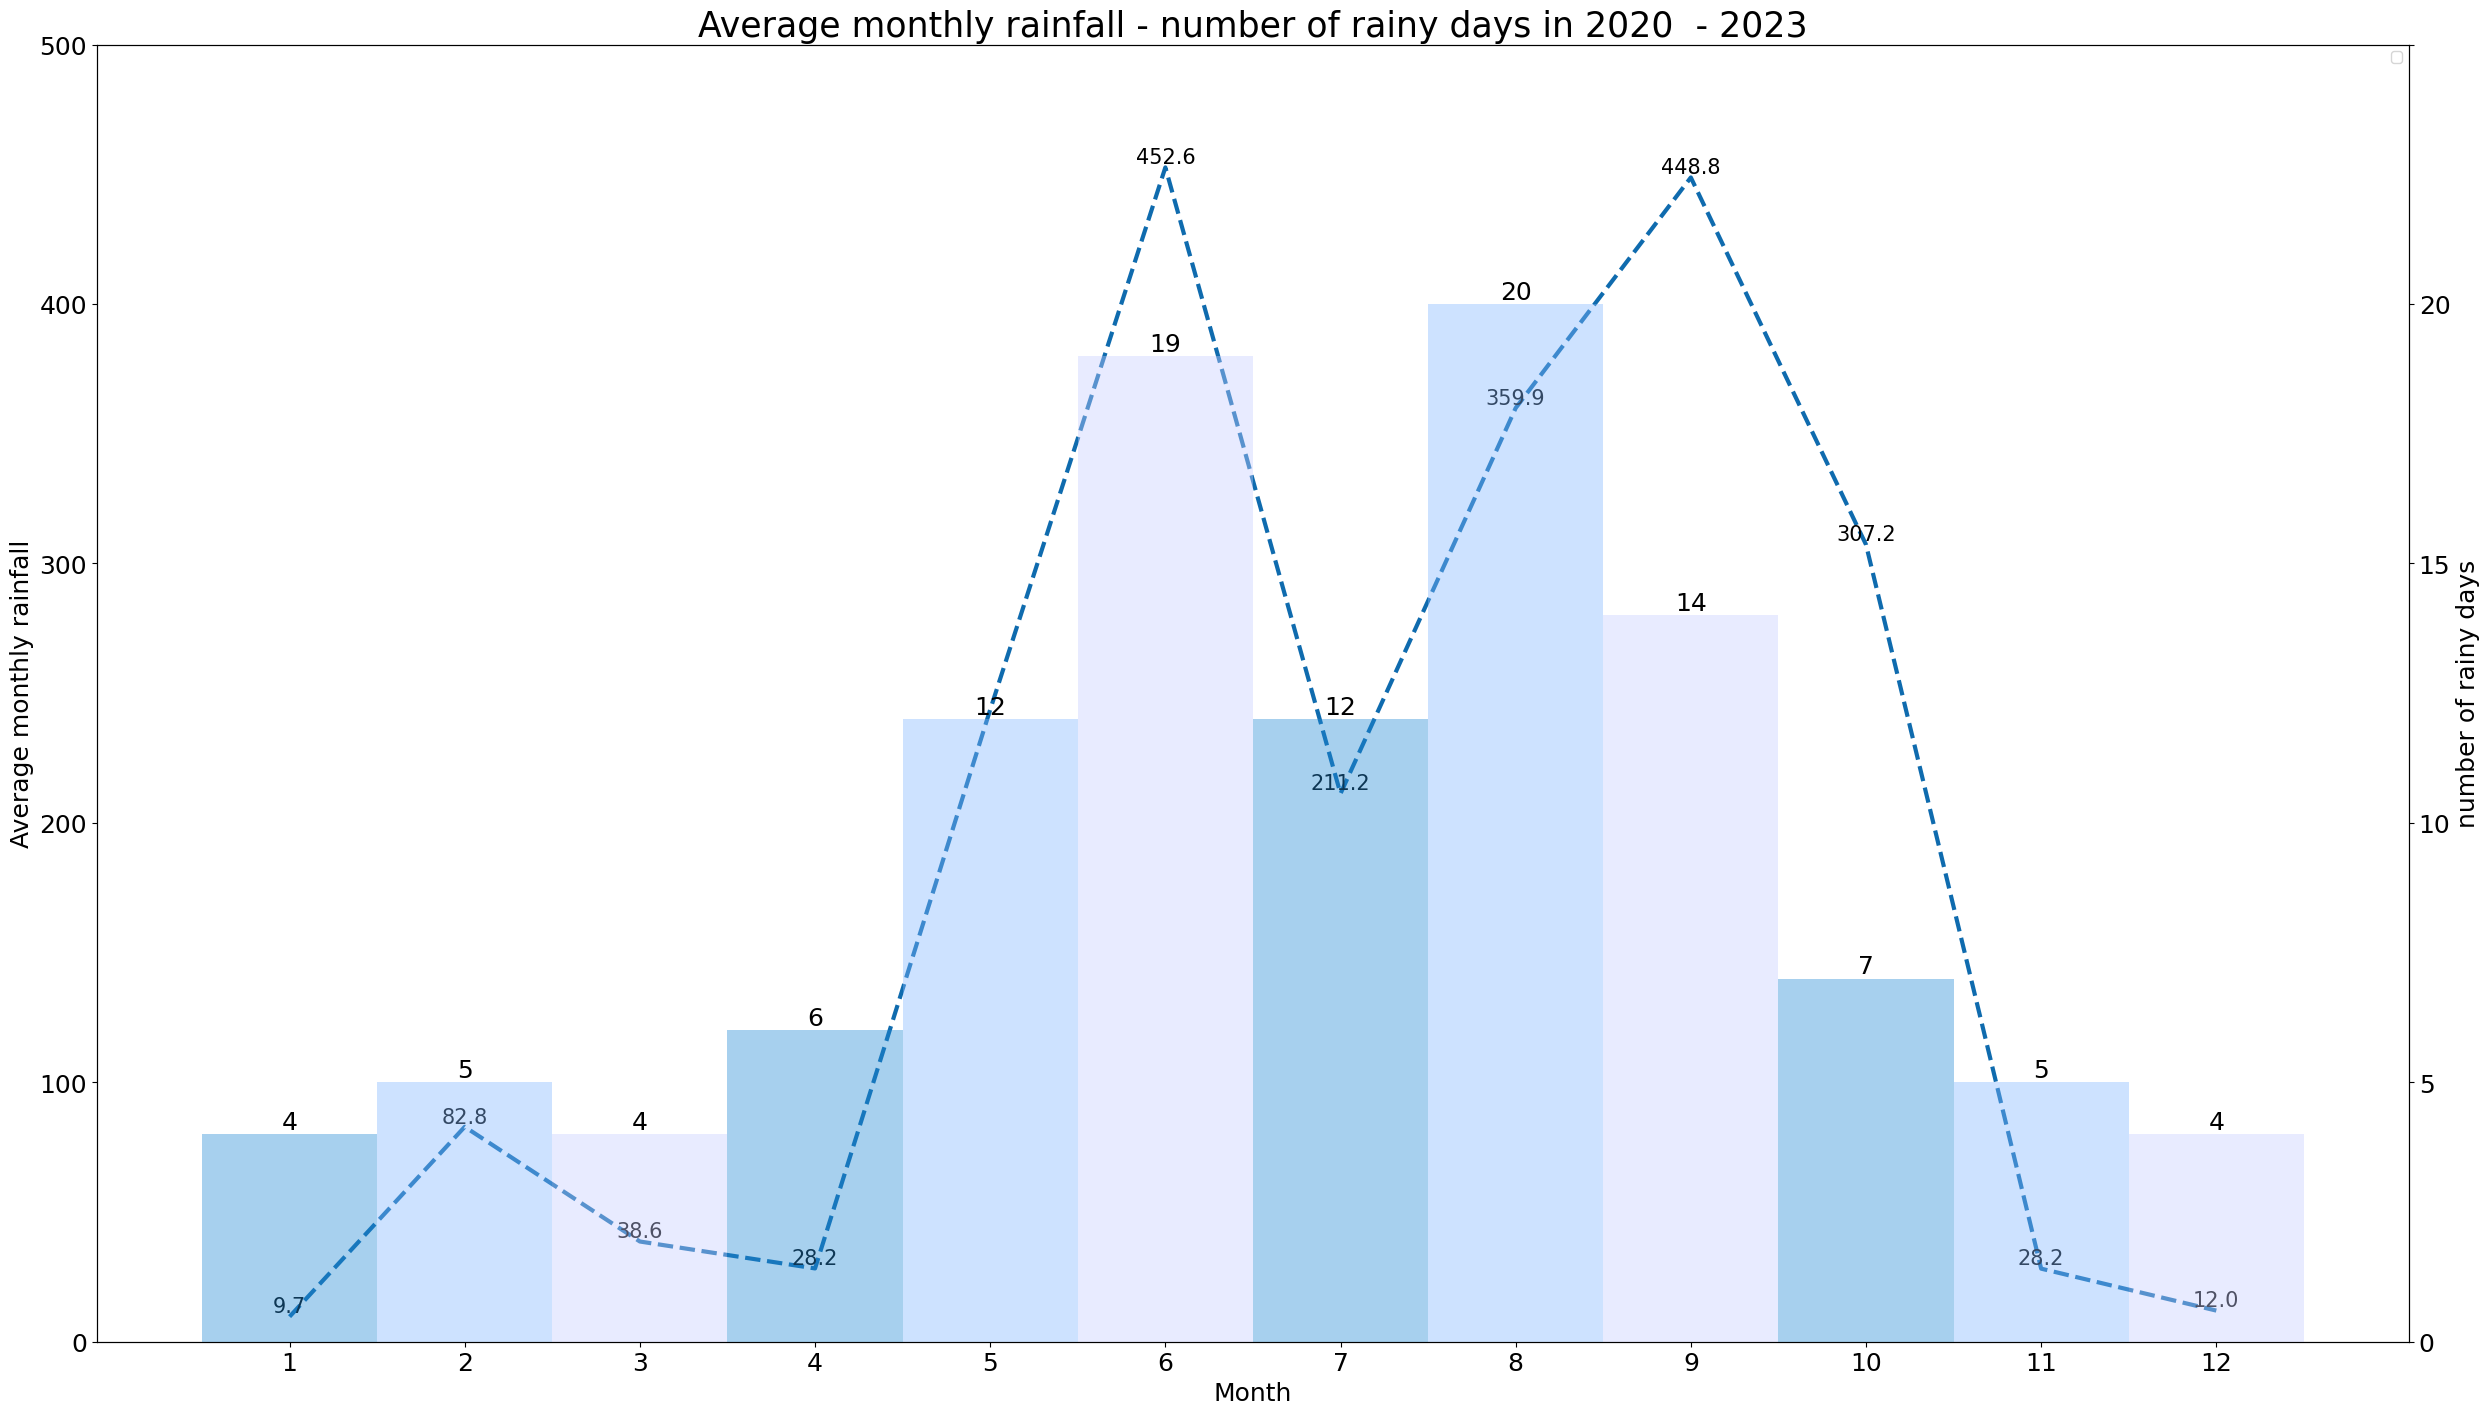

In [390]:
all_rainfall_ssp = monthly_total_rain[monthly_total_rain['area'] == 'Sham Shui Po'] 
# all_rainfall_ssp

all_rain_data = pd.concat([rain_data_2020, rain_data_2021, rain_data_2022, rain_data_2023])
all_rain_data = all_rain_data[all_rain_data['area'] == 'Sham Shui Po']
all_rain_data['day'] = all_rain_data['Time'].str[:11]
all_rain_data = all_rain_data.groupby(['day'])['rain'].count().reset_index() 
all_rain_data['month'] = all_rain_data['day'].str[5:7]
all_rain_data['year'] = all_rain_data['day'].str[:4]
all_rain_data = all_rain_data.groupby(['year','month'])['day'].count().reset_index() 
all_rain_data = all_rain_data.groupby(['month'])['day'].mean().round().reset_index() 

fig, ax1 = plt.subplots(figsize = (25,14))
x1 = all_rainfall_ssp['month']
y1 = all_rainfall_ssp["rain"]
x2 = all_rain_data['month']
y2 = all_rain_data['day']

ax1.plot(x1,y1, color='#0F6BAE', linewidth=3, linestyle='--')
for _x, _y in zip(x1, y1):
    if _x != '05':
        plt.text(_x, _y, '%.1f' % _y, ha='center', va='bottom', size=15)
ax1.set_xlabel('Month', fontdict={'size':18})
ax1.set_xticklabels(np.arange(12) +1, fontsize = 18)
ax1.set_ylim([0, 500])
ax1.set_yticklabels(np.arange(0, 501, 100), fontsize = 18)
ax1.set_ylabel('Average monthly rainfall', fontdict={'size':18})

# 在ax1上创建一个辅助的y轴
ax2 = ax1.twinx()
ax2.bar(x2, y2, color=['#248BD6', '#83B8FF', '#C6CDFF'], width=1,alpha = 0.4)
for _x, _y in zip(x2, y2):
    plt.text(_x, _y, '%.0f' % _y, ha='center', va='bottom', size=18)
ax2.set_ylim([0, 25])
ax2.set_yticklabels(np.arange(0, 25, 5), fontsize = 18)
ax2.set_ylabel('number of rainy days', fontdict={'size':18})

# 设置图形标题和布局
fig.tight_layout()
plt.title("Average monthly rainfall - number of rainy days in 2020  - 2023", fontdict={'size':25})
plt.legend()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\737161556.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(np.arange(12)+1, fontsize = 18)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\737161556.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(np.arange(0, 501, 100), fontsize = 18)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5068\737161556.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(np.arange(0, 100, 20), fontsize = 18)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


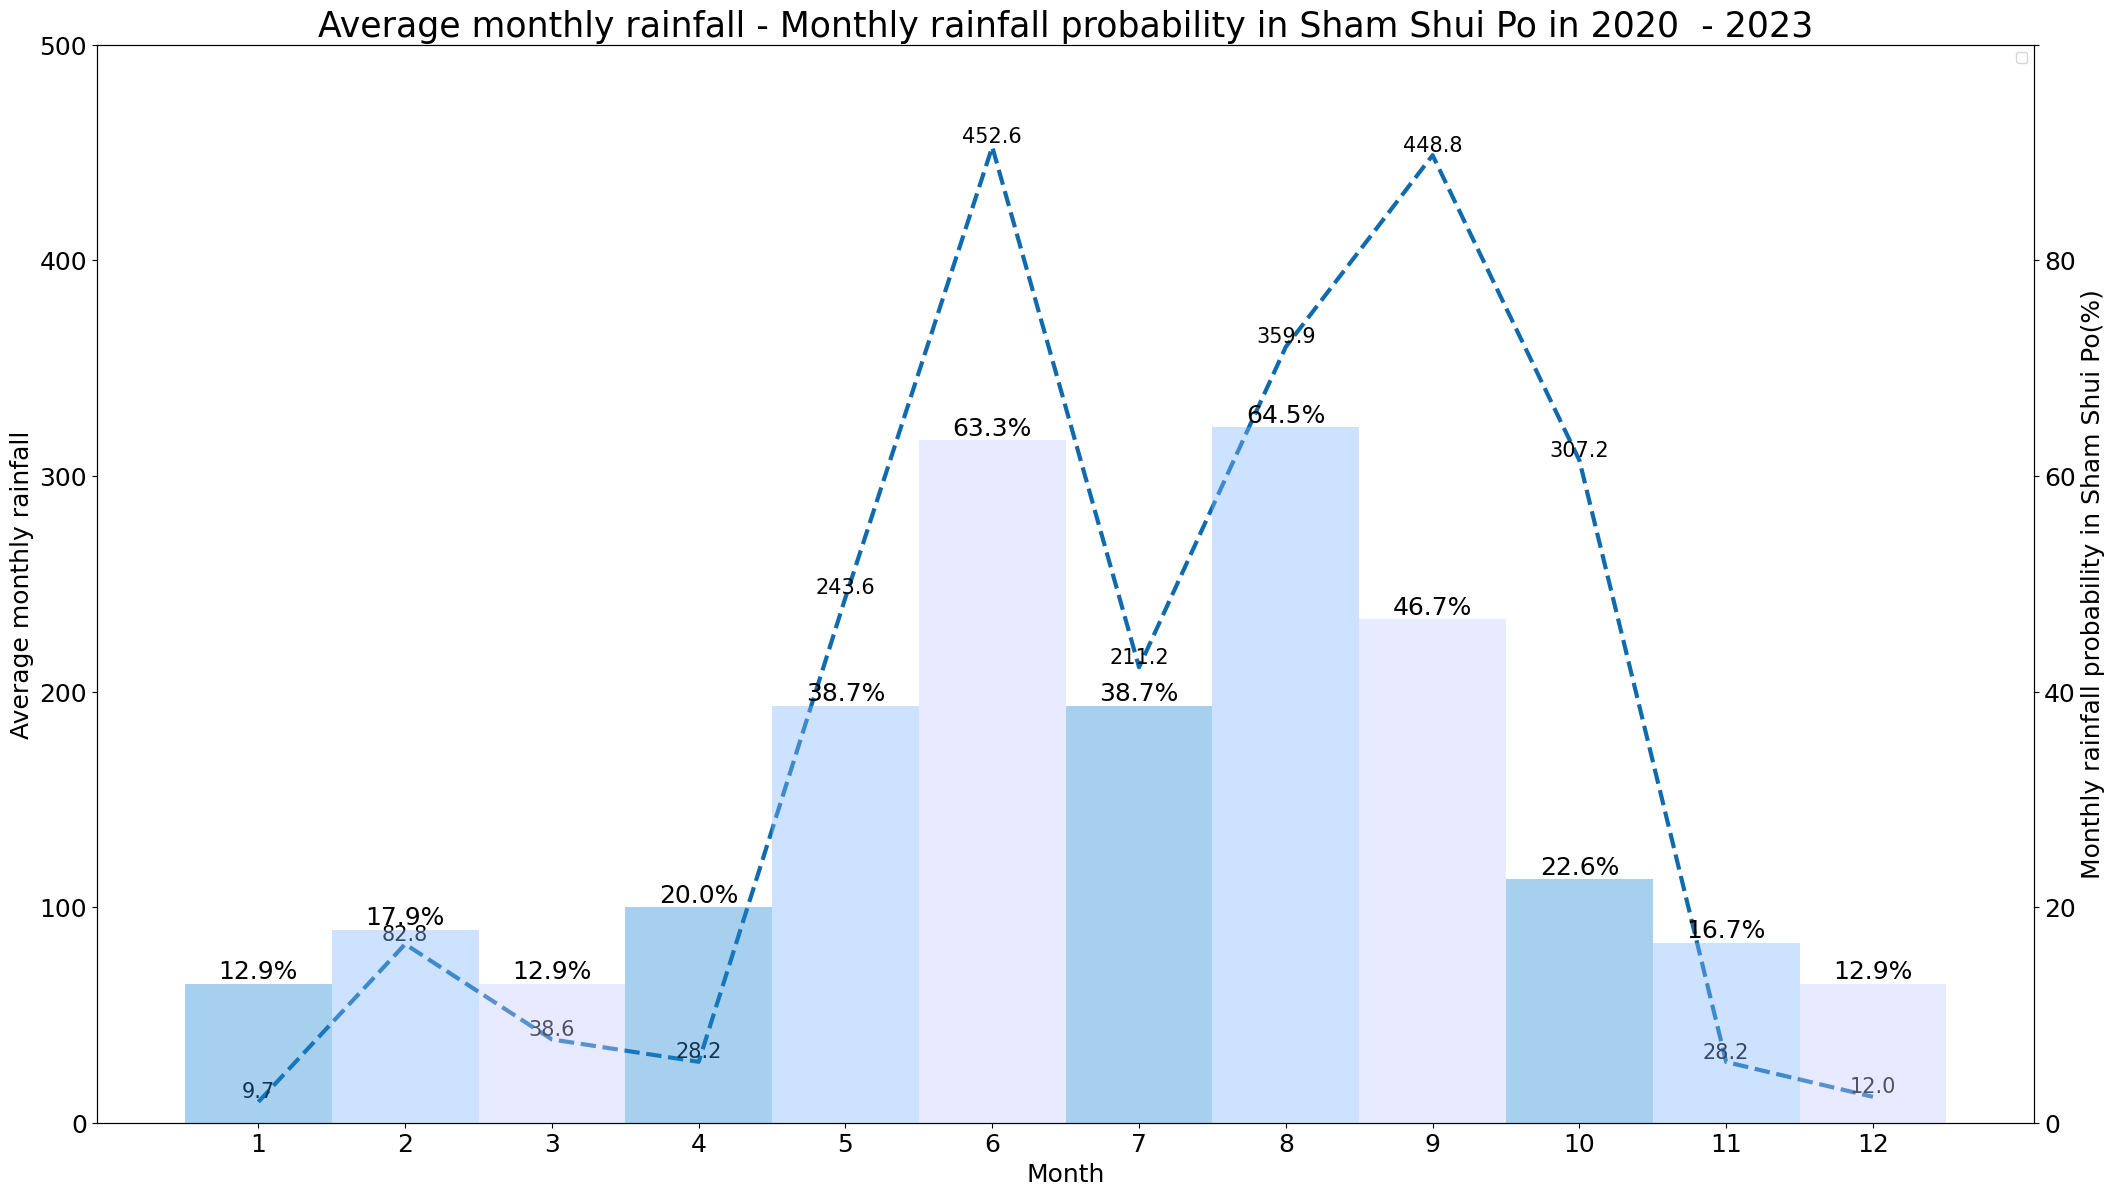

In [391]:
month_days = [31,28,31,30,31,30,31,31,30,31,30,31]
fig_prop, ax3 = plt.subplots(figsize = (25,14))

y_prop = []
for i in range(12):
    y_prop.append(round(y2[i]/month_days[i] * 100, 1)) 

ax3.plot(x1,y1, color='#0F6BAE', linewidth=3, linestyle='--')
for _x, _y in zip(x1, y1):
    plt.text(_x, _y, '%.1f' % _y, ha='center', va='bottom', size=15)    
ax3.set_xlabel('Month', fontdict={'size':18})
ax3.set_xticklabels(np.arange(12)+1, fontsize = 18)
ax3.set_ylim([0, 500])
ax3.set_yticklabels(np.arange(0, 501, 100), fontsize = 18)
ax3.set_ylabel('Average monthly rainfall', fontdict={'size':18})

# 在ax1上创建一个辅助的y轴
ax4 = ax3.twinx()
ax4.bar(x2, y_prop, color=['#248BD6', '#83B8FF', '#C6CDFF'], width=1,alpha = 0.4)
for _x, _y in zip(x2, y_prop):
    plt.text(_x, _y, str(_y) + '%', ha='center', va='bottom', size=18)
ax4.set_ylim([0, 100])
ax4.set_yticklabels(np.arange(0, 100, 20), fontsize = 18)
ax4.set_ylabel('Monthly rainfall probability in Sham Shui Po(%)', fontdict={'size':18})
# 
# 设置图形标题和布局
plt.title("Average monthly rainfall - Monthly rainfall probability in Sham Shui Po in 2020  - 2023", fontdict={'size':25})
plt.legend()
plt.show()

### 2020 - 2023 深水埗地区的每月降雨率(作废)

In [407]:
# 每日降水概率也只考虑2020 - 2022 因为2023后面两个月没法计算
ssh = pd.concat([rain_data_2020, rain_data_2021, rain_data_2022])
ssh = ssh[ssh['area'] == 'Sham Shui Po']
ssh['day'] = ssh['Time'].str[:11]
ssh = ssh.groupby(['day'])['rain'].sum().reset_index() 
ssh['day_str'] = ssh['day'].str[-6:]
ssh = ssh.groupby('day_str')['rain'].count().reset_index()
#01-11
for i in range(12):
    month_str = str(i + 1).zfill(2)
    start_date = datetime.strptime(month_str + "-01", "%m-%d")
    mid_date = datetime.strptime(month_str + "-15", "%m-%d")
    end_date = datetime.strptime(month_str + '-' + str(month_days[i]), "%m-%d")
    
    date_list = []
    date_list = ssh[ssh["day_str"].str.startswith(month_str)]
    



  day_str  rain
0  01-11      1
1  01-24      1
2  01-25      1
3  01-26      1
4  01-27      1
   day_str  rain
5   02-01      1
6   02-02      1
7   02-10      1
8   02-13      1
9   02-14      2
10  02-16      1
11  02-19      1
12  02-20      1
13  02-21      1
14  02-22      1
15  02-23      1
16  02-25      1
17  02-26      1
18  02-27      1
   day_str  rain
19  03-04      2
20  03-06      1
21  03-07      1
22  03-09      1
23  03-17      1
24  03-18      1
25  03-19      1
26  03-20      1
27  03-23      1
28  03-24      1
29  03-28      2
30  03-30      1
31  03-31      1
   day_str  rain
32  04-04      1
33  04-05      1
34  04-06      1
35  04-09      1
36  04-11      1
37  04-12      1
38  04-15      1
39  04-17      2
40  04-22      1
41  04-23      1
42  04-24      1
43  04-27      1
44  04-28      1
   day_str  rain
45  05-01      1
46  05-02      2
47  05-03      1
48  05-04      1
49  05-05      1
50  05-07      1
51  05-10      2
52  05-11      2
53  05-12      2
54 

In [392]:
# # 创建日期范围, 闰年的02-29是特殊情况，所以计算每日降水概率的时候不考虑进去
# start_date = datetime.strptime("01-01", "%m-%d")
# end_date = datetime.strptime("12-31", "%m-%d")
# delta = timedelta(days=1)
# dates = []
# values = []
# while start_date <= end_date:
#     date_str = start_date.strftime("%m-%d")
#     if ssh['day_str'].str.contains(date_str).any():
#         dates.append(start_date.strftime("%m-%d"))
#         value = round(ssh.loc[ssh['day_str'].str.contains(date_str)]['rain'] / 3 , 2)
#         values.append(float(value))
#     else:
#         dates.append(start_date.strftime("%m-%d"))
#         values.append(float(0.0))
#     start_date += delta
# df_dates = pd.DataFrame({"day_str": dates, "rain_prop": values})
# 
# 
# 
# fig = plt.subplots(figsize = (25,14))
# x = df_dates['day_str']
# y = df_dates["rain_prop"]
# 
# plt.plot(x, y, color='#248BD6')
# 
# # 设置图形标题和布局
# plt.tight_layout()
# plt.title("Average monthly rainfall - number of rainy days in 2020- 2023", fontdict={'size':25})
# plt.show()